# **EXAMPLE OF DATA**

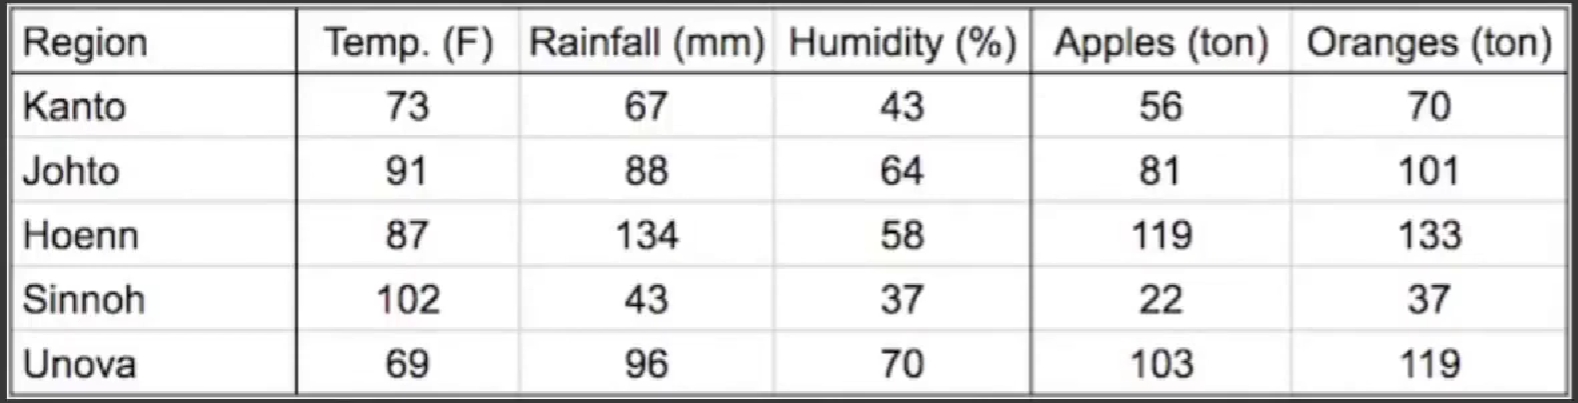

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F

# **INPUTS&TARGETS**

In [ ]:
inputs=np.array([[73, 67, 43], #temperature,rainfall,humidity
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [74, 66, 43],
                   [91, 87, 65],
                   [88, 134, 59],
                   [101, 44, 37],
                   [68, 96, 71],
                   [73, 66, 44],
                   [92, 87, 64],
                   [87, 135, 57],
                   [103, 43, 36],
                   [68, 97, 70]],
                  dtype='float32')
targets=np.array([[56, 70], #apples,oranges
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [57, 69],
                    [80, 102],
                    [118, 132],
                    [21, 38],
                    [104, 118],
                    [57, 69],
                    [82, 100],
                    [118, 134],
                    [20, 38],
                    [102, 120]],
                   dtype='float32')
inputs,targets

(array([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]], dtype=float32),
 array([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]], dtype=float32))

# **NUMPY TO TENSOR**

In [ ]:
inputs_t=torch.from_numpy(inputs)
inputs_t

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

In [ ]:
targets_t=torch.from_numpy(targets)
targets_t

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

# **DATASET FORMATION**

In [ ]:
train_ds=TensorDataset(inputs_t,targets_t)
train_ds[0:5]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.]]))

# **DATASET DIVISION INTO BATCHES**

In [ ]:
batch_size=5
train_dl=DataLoader(train_ds,batch_size,shuffle=True)
for inp,tar in train_dl:
  print(inp)
  print(tar)
  break

tensor([[ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.]])
tensor([[ 80., 102.],
        [118., 132.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.]])


# **nn.Linear(x,y)**
it uses formula inputs_t @ w.T()+b

random values are assigned to w and b

x=columns,y=rows for w

b is the 1-d array of size=2

model is an object in which input_t will be passed to calculate inputs_t @ w.T()+b which will be our prediction


In [ ]:
model=nn.Linear(3,2)
model.weight,model.bias

(Parameter containing:
 tensor([[ 0.3724, -0.3845, -0.2851],
         [ 0.4675,  0.3507,  0.2756]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4500, -0.5549], requires_grad=True))

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3724, -0.3845, -0.2851],
         [ 0.4675,  0.3507,  0.2756]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4500, -0.5549], requires_grad=True)]

# **F.mse_loss**
it consist of formula:

diff=t2-t1

return torch.sum(diff*diff)/diff.numel()

it will provide us loss

In [ ]:
loss_fn=F.mse_loss

# **torch.optim.SGD(model.parameters(),lr=1e-5)**
loss.backward()

  with torch.no_grad():

    w-=w.grad * 1e-5

    b-=b.grad * 1e-5

    w.grad.zero_()

    b.grad.zero_()

In [ ]:
opt=torch.optim.SGD(model.parameters(),lr=1e-5)

# **TRAIN THE MODEL**

In [ ]:
def fit(train_dl,model,loss_fn,opt):
  for epoch in range(100):
    for xb,yb in train_dl:
      preds=model(xb)
      loss=loss_fn(preds,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()
    if (epoch+1) % 10==0:
      print("loss->",{loss},'----->',loss.item())


In [ ]:
fit(train_dl,model,loss_fn,opt)

loss-> {tensor(790.8230, grad_fn=<MseLossBackward0>)} -----> 790.822998046875
loss-> {tensor(798.7552, grad_fn=<MseLossBackward0>)} -----> 798.7552490234375
loss-> {tensor(251.4527, grad_fn=<MseLossBackward0>)} -----> 251.4526824951172
loss-> {tensor(236.5822, grad_fn=<MseLossBackward0>)} -----> 236.58224487304688
loss-> {tensor(373.4571, grad_fn=<MseLossBackward0>)} -----> 373.45709228515625
loss-> {tensor(153.3660, grad_fn=<MseLossBackward0>)} -----> 153.365966796875
loss-> {tensor(143.3420, grad_fn=<MseLossBackward0>)} -----> 143.34201049804688
loss-> {tensor(60.7655, grad_fn=<MseLossBackward0>)} -----> 60.765464782714844
loss-> {tensor(75.4512, grad_fn=<MseLossBackward0>)} -----> 75.45124053955078
loss-> {tensor(23.2479, grad_fn=<MseLossBackward0>)} -----> 23.247867584228516


In [ ]:
model(inputs_t)

tensor([[ 58.9861,  71.6101],
        [ 80.0915,  98.5020],
        [119.1056, 135.3102],
        [ 32.0602,  45.1985],
        [ 92.0287, 110.5157],
        [ 57.9629,  70.6560],
        [ 79.4889,  98.1497],
        [119.2190, 135.7193],
        [ 33.0834,  46.1526],
        [ 92.4493, 111.1174],
        [ 58.3835,  71.2578],
        [ 79.0683,  97.5480],
        [119.7081, 135.6625],
        [ 31.6396,  44.5968],
        [ 93.0519, 111.4698]], grad_fn=<AddmmBackward0>)

In [ ]:
targets_t

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [ ]:
model(torch.tensor([40.,23.4,35.2]))

tensor([23.8589, 31.1081], grad_fn=<AddBackward0>)